# Problem1

1-1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import statistics

x_train = np.array([0, 2, 3, 5])
y_train = np.array([1, 4, 9, 16])
x_test = np.array([[1], [4]])
y_test = np.array([[3], [12]])

In [2]:
class Polynomial_Model:
    b0=0
    b1=0
    b2=0
    b3=0
    b4=0
    degree=0
    def __init__(self, degree):
        self.degree = degree
    
    
    def train(self,  x, y):
        if(self.degree == 0):
            self.b0 = np.mean(y)
        elif(self.degree == 1):
            self.b0 = np.mean(y-x)
            self.b1 = 1
        elif(self.degree == 2):
            x_sqrt_mean = np.mean(x**2)
            x_sqrt_sum = np.sum(x**2)
            
            self.b2 = 1
            self.b1 = (-np.dot(y, x)+(np.mean(y)-np.mean(x**2))*np.sum(x)+np.sum(x**3))/(np.mean(x)*np.sum(x)-np.sum(x**2))
            self.b0 = np.mean(y)-self.b1*np.mean(x)-x_sqrt_mean
        elif(self.degree == 3):
            kk,jj = curve_fit(func_3, x, y)
            self.b0 = kk[0]
            self.b1 = kk[1]
            self.b2 = kk[2]
            self.b3 = 1
        elif(self.degree == 4):
            kk,jj = curve_fit(func_4, x, y)
            self.b0 = kk[0]
            self.b1 = kk[1]
            self.b2 = kk[2]
            self.b3 = kk[3]
            self.b4 = 1
    
    
    def predict(self, x):
        if(self.degree == 0):
            return self.b1*x+self.b0
        elif(self.degree == 1):
            return self.b1*x+self.b0
        elif(self.degree == 2):
            return self.b2*(x**2)+self.b1*x+self.b0
        elif(self.degree == 3):
            return self.b3*(x**3)+self.b2*(x**2)+self.b1*x+self.b0
        elif(self.degree == 4):
            return self.b4*(x**4)+self.b3*(x**3)+self.b2*(x**2)+self.b1*x+self.b0

In [3]:
def func_3(x, a0, a1, a2):
    return a0+a1*x+a2*(x**2)+(x**3)
def func_4(x, a0, a1, a2, a3):
    return a0+a1*x+a2*(x**2)+a3*(x**3)+(x**4)
def RSS(y, y_hat):
    rss=0
    for i in range(len(y)):
        rss = rss+(y[i]-y_hat[i])**2
    return rss

In [4]:
pm0 = Polynomial_Model(0)
pm1 = Polynomial_Model(1)
pm2 = Polynomial_Model(2)
pm3 = Polynomial_Model(3)
pm4 = Polynomial_Model(4)

In [5]:
pm0.train(x_train, y_train)
pm1.train(x_train, y_train)
pm2.train(x_train, y_train)
pm3.train(x_train, y_train)
pm4.train(x_train, y_train)

/Users/yuan64198/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


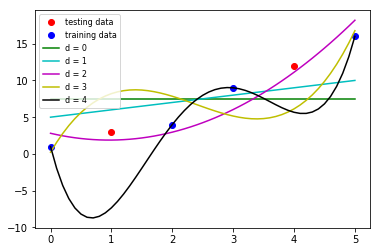

In [18]:
plt.plot(x_test, y_test, 'ro', label ='testing data')
plt.plot(x_train, y_train, 'bo', label ='training data')
t= np.array([[i/10] for i in range(51)])
plt.plot(t, pm0.predict(t), 'g', label ='d = 0')
plt.plot(t, pm1.predict(t), 'c', label ='d = 1')
plt.plot(t, pm2.predict(t), 'm', label ='d = 2')
plt.plot(t, pm3.predict(t), 'y', label ='d = 3')
plt.plot(t, pm4.predict(t), 'k', label ='d = 4')
plt.legend(loc='upper left', prop={'size': 8})
plt.show()

1-2

In [10]:
def cal_rss(pred, ground):
    ret = 0
    for i in range(len(pred)):
        ret += (pred[i]-ground[i])**2
    return ret
def cal_variance(x):
    return np.var(x)
def cal_error(x, y):
    return cal_variance(x)+cal_bias(x, y)
def cal_bias(x, y):
    ret = 0
    for i in range(len(x)):
        ret+= np.abs(x[i]-y[i])
    return ret

In [19]:
bias_sqrt = [ 
        cal_bias(pm1.predict(x_train), y_train)**2, 
        cal_bias(pm2.predict(x_train), y_train)**2, 
        cal_bias(pm3.predict(x_train), y_train)**2, 
        cal_bias(pm4.predict(x_train), y_train)**2]

In [20]:
var = [ 
       cal_variance(pm1.predict(x_train)),
       cal_variance(pm2.predict(x_train)), 
       cal_variance(pm3.predict(x_train)),
       cal_variance(pm4.predict(x_train))]

In [21]:
train_err = [
         cal_error(pm1.predict(x_train), y_train),
         cal_error(pm2.predict(x_train), y_train),
         cal_error(pm3.predict(x_train), y_train),
         cal_error(pm4.predict(x_train), y_train)]

In [22]:
test_err = [
         cal_error(pm1.predict(x_test), y_test),
         cal_error(pm2.predict(x_test), y_test),
         cal_error(pm3.predict(x_test), y_test),
         cal_error(pm4.predict(x_test), y_test)]

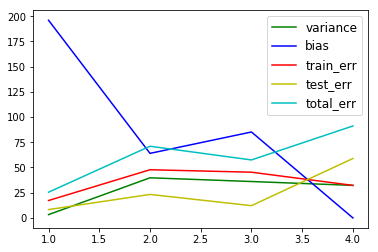

In [26]:
plt.plot([1,2,3,4], var, 'g', label ='variance')
plt.plot([1,2,3,4], bias_sqrt, 'b', label ='bias')
plt.plot([1,2,3,4], train_err, 'r', label ='train_err')
plt.plot([1,2,3,4], test_err, 'y', label ='test_err')
plt.plot([1,2,3,4], [train_err[i]+test_err[i] for i in range(len(train_err))], 'c', label ='total_err')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

1-4

In [27]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize
from sklearn.model_selection import KFold

def cost_function(params, X, y, p):
    error_vector = y - np.dot(X, params)
    return np.linalg.norm(error_vector, ord=p)

df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
X = df[['Lag1','Lag2']]
y = df['Today']

In [28]:
reg_l1 = minimize(cost_function, [0.5,0.5], args=(X.values, y.values, 1))
reg_l2 = minimize(cost_function, [0.5,0.5], args=(X.values, y.values, 2))

In [29]:
def fit(X, params):
    return X.dot(params)

In [34]:
def cross_validation( X, y, cv):
    #Here we can discuss the diff between shuffle and non-shuffle
    kf = KFold(n_splits=cv,shuffle=False)
    rss1=0
    rss2=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #TODO: add reg func l1 l2 here
        reg_l1 = minimize(cost_function, [300,300], args=(X_train, y_train, 1))
        reg_l2 = minimize(cost_function, [300,300], args=(X_train, y_train, 2))
        
        tmp = cal_rss(fit(X_test, reg_l1.x), y_test)
        print("L1 norm cv RSS:")
        print(tmp)
        rss1+=tmp
        tmp = cal_rss(fit(X_test, reg_l2.x), y_test)
        print("L2 norm cv RSS:")
        print(tmp) 
        rss2+=tmp
    print("Mean RSS of cross validation")
    print(rss1/cv)
    print(rss2/cv)

In [35]:
cross_validation( X.values, y.values, 5)

L1 norm cv RSS:
422.8361149664075
L2 norm cv RSS:
421.627977427969
L1 norm cv RSS:
697.743646789782
L2 norm cv RSS:
695.6391042661398
L1 norm cv RSS:
269.2481590881537
L2 norm cv RSS:
272.1310003625963
L1 norm cv RSS:
123.52338619172684
L2 norm cv RSS:
123.34939659041774
L1 norm cv RSS:
102.51181546850891
L2 norm cv RSS:
102.90499363188384
Mean RSS of cross validation
323.1726245009158
323.13049445580134
